In [29]:
import matplotlib.pyplot as plt 
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, AveragePooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.applications import InceptionV3, inception_v3
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))


Num GPUs Available:  1


# Create Datasets

In [26]:
# Load Directories
train_directory = "/home/luke/datasets/test-5"
test_directory = "/home/luke/datasets/test-10"

def create_train_val_datasets(
    input_dir,
    output_dir="data/datasets",
    img_height=299,
    img_width=299,
    batch_size=32,
    save_dataset=False,
):
    """
    Creates train and validation datasets from images in the input directory.

    Args:
        input_dir (str): The path to the input directory containing 'real' and 'fake' subdirectories.
        output_dir (str): The directory where the TFRecord files will be saved. Default is 'data/datasets'.
        img_height (int): The height of the input images. Default is 299.
        img_width (int): The width of the input images. Default is 299.
        batch_size (int): The batch size for the data generators. Default is 32.
        save_dataset (bool): Whether to save the datasets as TFRecord files. Default is True.

    Returns:
        tf.data.Dataset, tf.data.Dataset: The train and validation datasets.
    """
    # Create ImageDataGenerator with validation split
    datagen = ImageDataGenerator(
        preprocessing_function=inception_v3.preprocess_input,
        validation_split=0.2,
    )


    # datagen = ImageDataGenerator(rescale = 1./255, 
    #                                     validation_split = 0.2,
    #                                     horizontal_flip = True,
    #                                     #rotation_range = 10,
    #                                     zoom_range = 0.1,
    #                                     #shear_range = 10,
    #                                     brightness_range = [0.90, 1.10]
    #                                     )
    
    # Create a train and validation data generator
    train_gen = datagen.flow_from_directory(
        input_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="binary",
        subset="training",
        shuffle=True
    )

    val_gen = datagen.flow_from_directory(
        input_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="binary",
        subset="validation",
        shuffle=True
    )
    
    # Save the dataset if requested
    if save_dataset:
        train_filename = generate_filename("train_ds")
        val_filename = generate_filename("val_ds")
        tf.data.Dataset.save(train_gen, f"{output_dir}/{train_filename}.tfrecords")
        tf.data.Dataset.save(val_gen, f"{output_dir}/{val_filename}.tfrecords")
    
    return train_gen, val_gen

def create_test_dataset(
    input_dir,
    output_dir="data/datasets",
    img_height=299,
    img_width=299,
    batch_size=32,
    save_dataset=False,
):
    """
    Creates a test dataset from images in the input directory.

    Args:
        input_dir (str): The path to the input directory containing 'real' and 'fake' subdirectories.
        output_dir (str): The directory where the TFRecord file will be saved. Default is 'data/datasets'.
        img_height (int): The height of the input images. Default is 299.
        img_width (int): The width of the input images. Default is 299.
        batch_size (int): Th# Load Directories
    """

def create_train_val_datasets(
    input_dir,
    output_dir="data/datasets",
    img_height=299,
    img_width=299,
    batch_size=32,
    save_dataset=False,
):
    """
    Creates train and validation datasets from images in the input directory.

    Args:
        input_dir (str): The path to the input directory containing 'real' and 'fake' subdirectories.
        output_dir (str): The directory where the TFRecord files will be saved. Default is 'data/datasets'.
        img_height (int): The height of the input images. Default is 299.
        img_width (int): The width of the input images. Default is 299.
        batch_size (int): The batch size for the data generators. Default is 32.
        save_dataset (bool): Whether to save the datasets as TFRecord files. Default is True.

    Returns:
        tf.data.Dataset, tf.data.Dataset: The train and validation datasets.
    """
    # Create ImageDataGenerator with validation split
    datagen = ImageDataGenerator(
                preprocessing_function=inception_v3.preprocess_input,
    )

    # Create a train and validation data generator
    train_gen = datagen.flow_from_directory(
        input_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="binary",
        subset="training",
        shuffle=True
    )

    val_gen = datagen.flow_from_directory(
        input_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="binary",
        subset="validation",
        shuffle=True
    )
    
    # Save the dataset if requested
    if save_dataset:
        train_filename = generate_filename("train_ds")
        val_filename = generate_filename("val_ds")
        tf.data.Dataset.save(train_gen, f"{output_dir}/{train_filename}.tfrecords")
        tf.data.Dataset.save(val_gen, f"{output_dir}/{val_filename}.tfrecords")
    
    return train_gen, val_gen

def create_test_dataset(
    input_dir,
    output_dir="data/datasets",
    img_height=299,
    img_width=299,
    batch_size=32,
    save_dataset=False,
):
    """
    Creates a test dataset from images in the input directory.

    Args:
        input_dir (str): The path to the input directory containing 'real' and 'fake' subdirectories.
        output_dir (str): The directory where the TFRecord file will be saved. Default is 'data/datasets'.
        img_height (int): The height of the input images. Default is 299.
        img_width (int): The width of the input images. Default is 299.
        batch_size (int): The batch size for the data generators. Default is 32.
        save_dataset (bool): Whether to save the dataset as a TFRecord file. Default is True.

    Returns:
        tf.data.Dataset: The test dataset.
    """
    # Create ImageDataGenerator
    datagen = ImageDataGenerator(
        preprocessing_function=inception_v3.preprocess_input
    )

    # Load all images
    test_gen = datagen.flow_from_directory(
        input_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode="binary",
        shuffle=True
    )
    
    if save_dataset:
        filename = generate_filename("test_ds")
        tf.data.Dataset.save(test_gen, f"{output_dir}/{filename}.tfrecords")

    return test_gen

train_ds, val_ds = create_train_val_datasets(train_directory, batch_size=32)
test_ds = create_test_dataset(test_directory, batch_size=32)

Found 2139 images belonging to 2 classes.
Found 0 images belonging to 2 classes.
Found 4279 images belonging to 2 classes.


# Visualize Data

[0. 0. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 1. 0. 0.]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

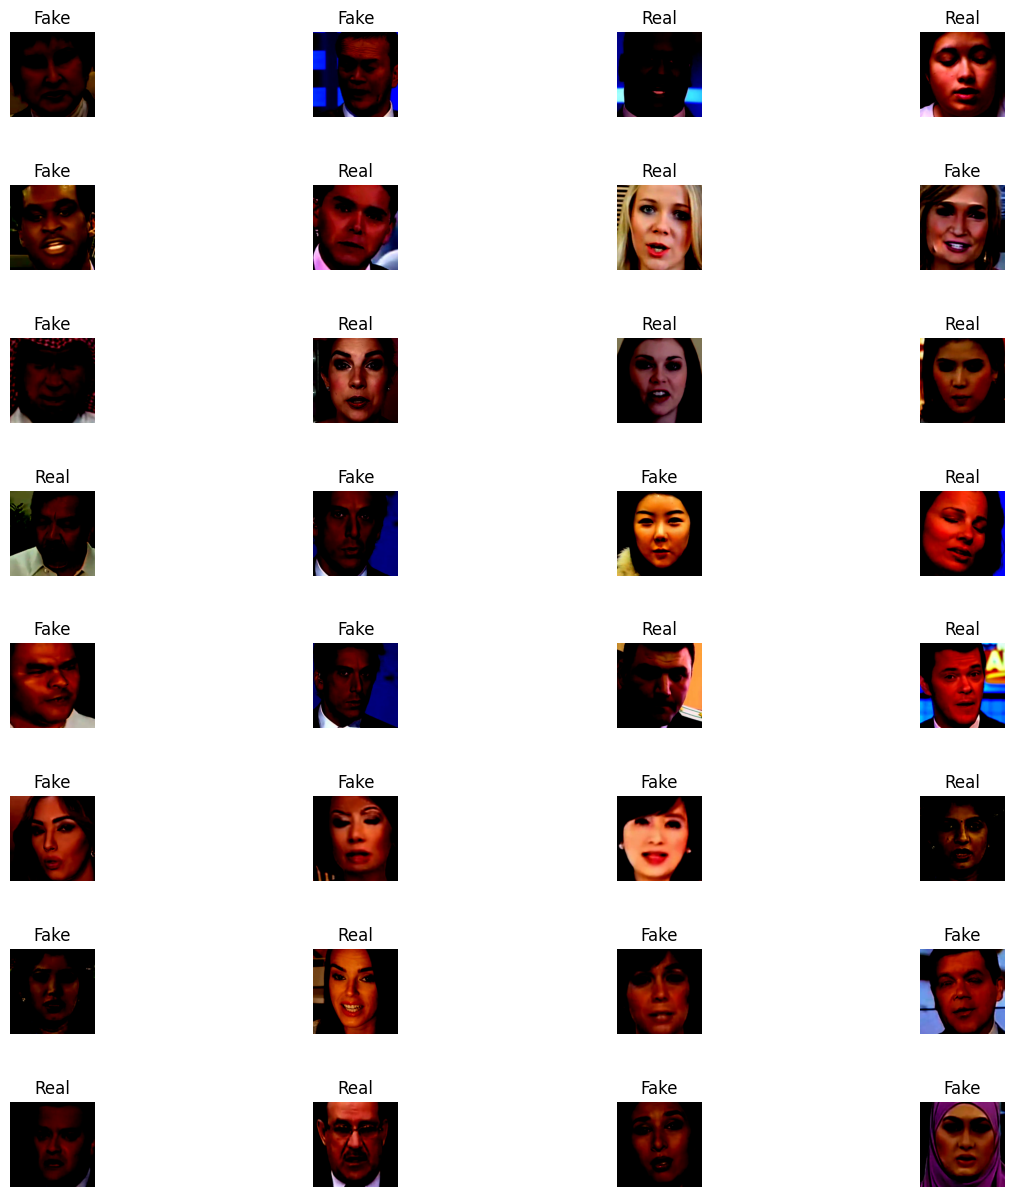

In [27]:
# Import first 32 images (first batch)
train_images, train_labels = next(train_ds)
print(train_labels)

# Redefine labels
label_names = {0: 'Fake', 1: 'Real'}

# Show some of our samples
# Define length and width of our figure
L = 8
W = 4

fig, axes = plt.subplots(L, W, figsize=(15, 15))
axes = axes.ravel()

for i in np.arange(0, L * W):
    axes[i].imshow(train_images[i])
    axes[i].set_title(label_names[train_labels[i]])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.8)

# Building and Visualizing model

In [30]:
base_model = InceptionV3(
    weights="imagenet", 
    include_top=False,
    input_tensor=Input(shape=(299, 299, 3)))

top_model = base_model.output
top_model = Flatten()(top_model)
top_model = Dropout(0.5)(top_model)
top_model = Dense(2, activation="softmax")(top_model)

model = Model(inputs=inception.input, outputs=outputs)

for layer in inception.layers:
    layer.trainable = False
    
model.compile(
        loss='categorical_crossentropy', 
        optimizer='adam', 
        metrics=['accuracy']
)

2023-05-20 12:03:08.713729: W tensorflow/tsl/framework/bfc_allocator.cc:485] Allocator (GPU_0_bfc) ran out of memory trying to allocate 540.0KiB (rounded to 552960)requested by op StatelessRandomUniformV2
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-05-20 12:03:08.713782: I tensorflow/tsl/framework/bfc_allocator.cc:1039] BFCAllocator dump for GPU_0_bfc
2023-05-20 12:03:08.713794: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (256): 	Total Chunks: 266, Chunks in use: 266. 66.5KiB allocated for chunks. 66.5KiB in use in bin. 41.0KiB client-requested in use in bin.
2023-05-20 12:03:08.713803: I tensorflow/tsl/framework/bfc_allocator.cc:1046] Bin (512): 	Total Chunks: 399, Chunks in use: 399. 264.8KiB allocated for chunks. 264.8KiB in use in bin. 243.4KiB client-requested in use in bin.
2023-05-20 12:03:08.713810: I te

ResourceExhaustedError: {{function_node __wrapped__StatelessRandomUniformV2_device_/job:localhost/replica:0/task:0/device:GPU:0}} OOM when allocating tensor with shape[3,3,80,192] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:StatelessRandomUniformV2]